In [1]:
import ROOT

Welcome to JupyROOT 6.22/09


In [2]:
import matplotlib.pyplot as plt

In [2]:
#Analytical shape
# Define variables
mass = ROOT.RooRealVar("mass", "Mass", -4000, 4000)  # Assuming a mass range from 0 to 1000 GeV
mean = ROOT.RooRealVar("mean", "Mean", 1000)  # Mean value with initial value and allowed range
width = ROOT.RooRealVar("width", "Width", 100)  # Width with initial value and allowed range

# Define Breit-Wigner function
#bw = ROOT.RooBreitWigner("bw", "Breit-Wigner", mass, mean, width)
bw = ROOT.RooGenericPdf("bw",
                        "Breit-Wigner",
                        "((mean*width)/pi)*((2*mass)/( ((mass*mass-mean*mean)*(mass*mass-mean*mean))+ ((mean*width)*(mean*width)) ))",
                       ROOT.RooArgSet(mass,mean,width))

#Draw
#canvas = ROOT.TCanvas("canvas", "BW Function Example")
#frame = mass.frame()
#bw.plotOn(frame)
#frame.Draw()
#frame.SetMinimum(10e-8)
#frame.SetMaximum(10e-1)
#canvas.SetLogy()
#canvas.SetGrid()
#canvas.Draw()

In [6]:
#retrieve Resolution from rootfile
ggHshape = ROOT.TFile("Resolution/2l2q_resolution_merged_2018.root")
#define current mass
mH = 1000
#build params
## tail parameters
name = "a1_ggH_"
a1_ggH = ROOT.RooRealVar(name,name, (ggHshape.Get("a1")).GetListOfFunctions().First().Eval(mH))
name = "a2_ggH_"
a2_ggH = ROOT.RooRealVar(name,name, (ggHshape.Get("a2")).GetListOfFunctions().First().Eval(mH))
name = "n1_ggH_"
n1_ggH = ROOT.RooRealVar(name,name, (ggHshape.Get("n1")).GetListOfFunctions().First().Eval(mH))
name = "n2_ggH_"
n2_ggH = ROOT.RooRealVar(name,name, (ggHshape.Get("n2")).GetListOfFunctions().First().Eval(mH))
##mean and sigma
name = "mean_ggH_"
mean_ggH = ROOT.RooRealVar(name,name, (ggHshape.Get("mean")).GetListOfFunctions().First().Eval(mH))
name = "sigma_ggH_"
sigma_ggH = ROOT.RooRealVar(name,name, (ggHshape.Get("sigma")).GetListOfFunctions().First().Eval(mH))

#build DCB
name = "signalCB_ggH_"
mean_ggH.setVal(0)
signalCB_ggH = ROOT.RooDoubleCB(name,name,mass,mean_ggH,sigma_ggH,a1_ggH,n1_ggH,a2_ggH,n2_ggH)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


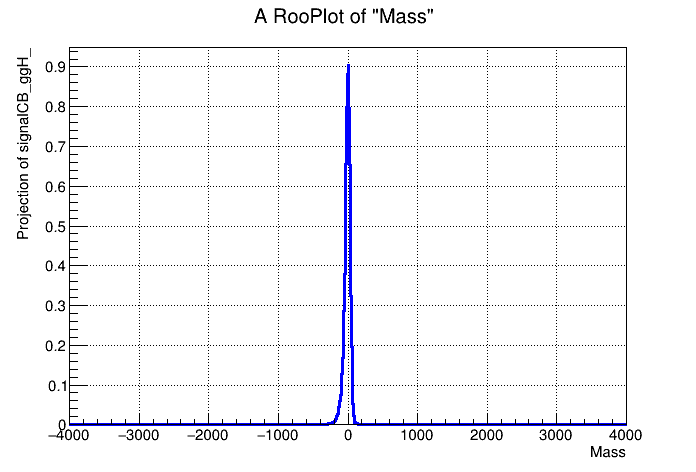

In [7]:
#Draw
canvas = ROOT.TCanvas("canvas", "BW Function Example")
frame = mass.frame()
signalCB_ggH.plotOn(frame)
frame.Draw()
#frame.SetMinimum(10e-8)
#frame.SetMaximum(10e-1)
#canvas.SetLogy()
canvas.SetGrid()
canvas.Draw()

In [8]:
signal_shape = ROOT.RooFFTConvPdf(name,name,mass,bw,signalCB_ggH)

[#1] INFO:Caching -- Changing internal binning of variable 'mass' in FFT 'signalCB_ggH_' from 100 to 930 to improve the precision of the numerical FFT. This can be done manually by setting an additional binning named 'cache'.


[#0] ERROR:LinkStateMgmt -- RooAbsArg::redirectServers(signalCB_ggH_): ERROR, proxy '!pdf2' with arg 'signalCB_ggH_' could not be adjusted
[#1] INFO:Eval -- RooRealVar::setRange(mass) new range named 'refrange_fft_signalCB_ggH_' created with bounds [-4000,4000]
[#0] ERROR:Eval -- RooAbsReal::logEvalError(bw) evaluation error, 
 origin       : RooGenericPdf::bw[ actualVars=(mass,mean,width) formula="((x[1]*x[2])/pi)*((2*x[0])/( ((x[0]*x[0]-x[1]*x[1])*(x[0]*x[0]-x[1]*x[1]))+ ((x[1]*x[2])*(x[1]*x[2])) ))" ]
 message      : p.d.f value is less than zero (-0.000001), forcing value to zero
 server values: actualVars=(mass = -4400,mean = 1000,width = 100)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bw_Int[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)
[#0] ERROR:Eval -- RooAbsReal::logEvalError(bw) evaluation error, 
 origin       : RooGenericPdf::bw[ actualVars=(mass,mean,width) formula="((x[1]*x[2])/pi)*((2*x[0])/( ((x[0]*x[0]-x[1]*x[1])*(x[0]*x[0]-x[1]*x[1

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


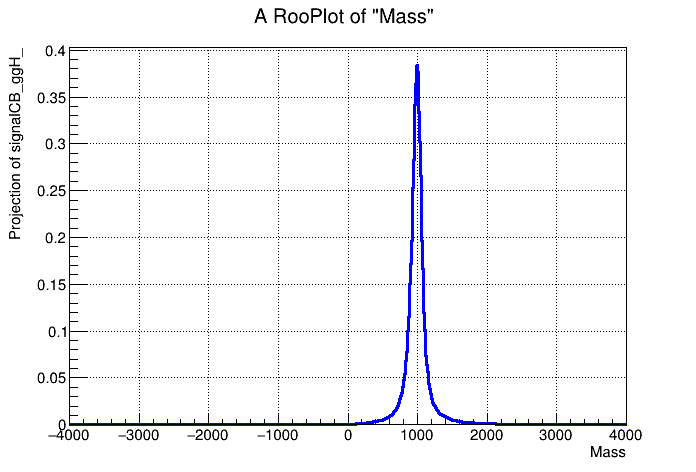

In [9]:
#Draw signal_shape#Draw
canvas = ROOT.TCanvas("canvas", "BW Function Example")
frame = mass.frame()
signal_shape.plotOn(frame)
frame.Draw()
#frame.SetMinimum(10e-8)
#frame.SetMaximum(10e-1)
#canvas.SetLogy()
canvas.SetGrid()
canvas.Draw()

In [14]:
signalCB_ggH

In [3]:
# Define variables
mass = RooRealVar("mass", "Mass", 5000, 5500)

# Define the parameters of the Breit-Wigner resonance
mean_bw = RooRealVar("mean_bw", "Mean", 5279, 5200, 5350)
width_bw = RooRealVar("width_bw", "Width", 10, 0, 50)
bw = RooBreitWigner("bw", "Breit-Wigner", mass, mean_bw, width_bw)

# Define the parameters of the Double Crystal Ball (DCB)
mean_dcb = RooRealVar("mean_dcb", "Mean", 5279, 5200, 5350)
sigma_dcb = RooRealVar("sigma_dcb", "Width", 10, 0, 50)
alpha1 = RooRealVar("alpha1", "Alpha1", 1.5, 0, 5)
n1 = RooRealVar("n1", "n1", 2, 0, 10)
alpha2 = RooRealVar("alpha2", "Alpha2", -1.5, -5, 0)
n2 = RooRealVar("n2", "n2", 2, 0, 10)
dcb = RooDoubleCB("dcb", "Double Crystal Ball", mass, mean_dcb, sigma_dcb, alpha1, n1, alpha2, n2)

# Convolve the Breit-Wigner and Double Crystal Ball
convolution = RooFFTConvPdf("convolution", "Convolution", mass, bw, dcb)

# Create a RooDataSet for testing (optional)
data = convolution.generate(RooArgSet(mass), 1000)

# Plot the convolution
frame = mass.frame()
data.plotOn(frame)
convolution.plotOn(frame)

# Draw the plot
canvas = TCanvas("canvas", "Convolution Plot", 800, 600)
frame.Draw()
canvas.SaveAs("convolution_plot.png")  # Save the plot to a file (optional)

[#1] INFO:Caching -- Changing internal binning of variable 'mass' in FFT 'convolution' from 100 to 930 to improve the precision of the numerical FFT. This can be done manually by setting an additional binning named 'cache'.
[#1] INFO:Eval -- RooRealVar::setRange(mass) new range named 'refrange_fft_convolution' created with bounds [5000,5500]
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(convolution) creating new cache 0xc937720 with pdf bw_CONV_dcb_CACHE_Obs[mass] for nset (mass) with code 0 from preexisting content.
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(convolution) creating new cache 0xc958af0 with pdf bw_CONV_dcb_CACHE_Obs[mass] for nset (mass) with code 0 from preexisting content.
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(convolution) creating new cache 0xc92f8c0 with pdf bw_CONV_dcb_CACHE_Obs[mass] for nset (mass) with code 0 from preexisting content.


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file convolution_plot.png has been created
